<a href="https://colab.research.google.com/github/kavmuni/dateSciencePython/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sureshgupta/health-insurance-data-set")

print("Path to dataset files: ", path)

Path to dataset files:  /kaggle/input/health-insurance-data-set


In [7]:
import pandas as pd
import numpy as np

In [16]:
insurance = pd.read_csv(path + "/1651277648862_healthinsurance.csv")

In [17]:
insurance.head(5)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [18]:
insurance.dtypes

,0
age,float64
sex,object
weight,int64
bmi,float64
hereditary_diseases,object
no_of_dependents,int64
smoker,int64
city,object
bloodpressure,int64
diabetes,int64


<Axes: xlabel='age', ylabel='claim'>

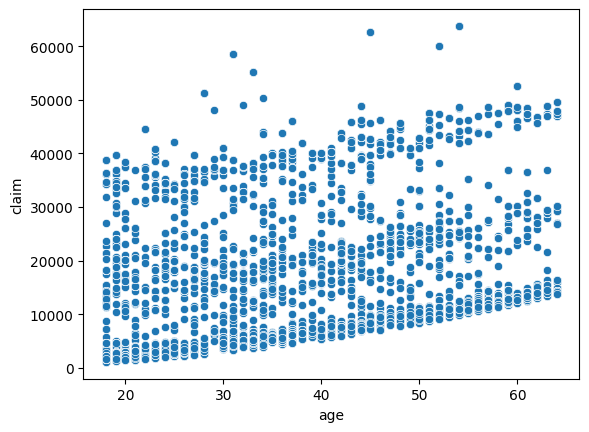

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=insurance, x="age", y="claim")

<Axes: xlabel='age', ylabel='claim'>

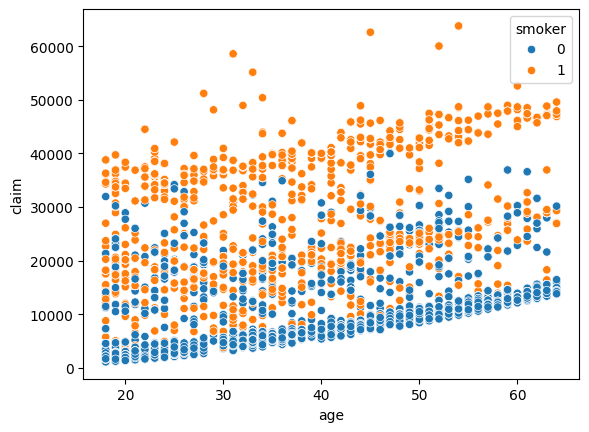

In [21]:
sns.scatterplot(data=insurance, x="age", y="claim", hue="smoker")

In [24]:
sns.lmplot?

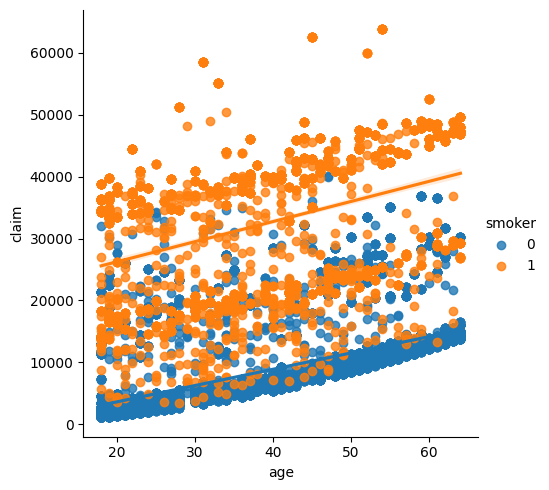

In [23]:
sns.lmplot(data=insurance, x="age", y="claim", hue="smoker")

In [25]:
insurance_number = insurance.select_dtypes(include=np.number)
# Covaraince works only works with numerical columns

In [26]:
insurance_number.cov()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
age,196.447307,54.736022,16.219756,1.028265,-0.109942,-2.268800,0.411533,0.050041,5.148566e+04
weight,54.736022,187.743011,21.092646,2.283947,0.084650,-5.543598,-0.059830,-0.031874,1.293621e+04
bmi,16.219756,21.092646,37.490517,0.386385,0.057514,-4.923241,0.208271,-0.100067,1.521623e+04
no_of_dependents,1.028265,2.283947,0.386385,1.509137,0.004096,0.592762,0.033333,-0.005278,1.009050e+03
smoker,-0.109942,0.084650,0.057514,0.004096,0.158887,0.044190,0.009651,-0.006142,3.745080e+03
bloodpressure,-2.268800,-5.543598,-4.923241,0.592762,0.044190,377.078732,-0.133362,0.344106,3.241798e+03
diabetes,0.411533,-0.059830,0.208271,0.033333,0.009651,-0.133362,0.173283,0.001382,6.845686e+02
regular_ex,0.050041,-0.031874,-0.100067,-0.005278,-0.006142,0.344106,0.001382,0.173909,-3.064582e+02
claim,51485.664946,12936.205221,15216.234049,1009.049543,3745.079925,3241.797762,684.568641,-306.458236,1.475797e+08


In [27]:
insurance_number.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [28]:
#Correlation
insurance_number.corr()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
age,1.000000,0.285646,0.188336,0.060436,-0.019627,-0.008317,0.070641,0.008548,0.301158
weight,0.285646,1.000000,0.251649,0.135687,0.015499,-0.020835,-0.010490,-0.005578,0.077716
bmi,0.188336,0.251649,1.000000,0.051498,0.023631,-0.041454,0.082376,-0.039318,0.206588
no_of_dependents,0.060436,0.135687,0.051498,1.000000,0.008364,0.024849,0.065182,-0.010302,0.067614
smoker,-0.019627,0.015499,0.023631,0.008364,1.000000,0.005709,0.058164,-0.036949,0.773399
bloodpressure,-0.008317,-0.020835,-0.041454,0.024849,0.005709,1.000000,-0.016498,0.042493,0.013742
diabetes,0.070641,-0.010490,0.082376,0.065182,0.058164,-0.016498,1.000000,0.007960,0.135371
regular_ex,0.008548,-0.005578,-0.039318,-0.010302,-0.036949,0.042493,0.007960,1.000000,-0.060492
claim,0.301158,0.077716,0.206588,0.067614,0.773399,0.013742,0.135371,-0.060492,1.000000
